In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso,Ridge,ElasticNet,RANSACRegressor,BayesianRidge,HuberRegressor,SGDRegressor
from sklearn.svm import LinearSVC,SVR
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor,RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

In [9]:
df=pd.read_csv('./Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [10]:
df.columns=['No','Trans_date','House_age','Distance_MRT','No_of_stores','Lat','Long','Price']

In [11]:
df.describe()

,No,Trans_date,House_age,Distance_MRT,No_of_stores,Lat,Long,Price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


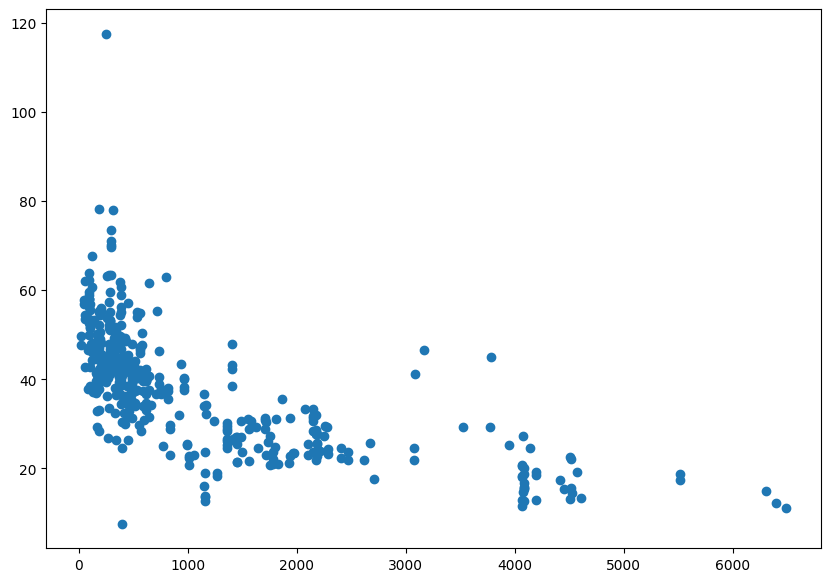

In [15]:
plt.figure(figsize=(10,7))
plt.scatter(df['Distance_MRT'],df['Price'])

In [16]:
df=df.drop(['No','Trans_date'],axis=1)

<AxesSubplot: >

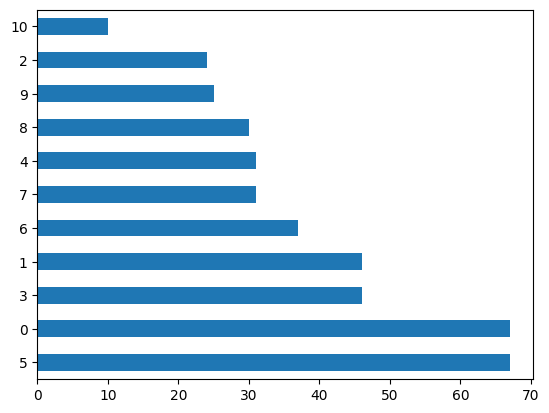

In [24]:
df['No_of_stores'].value_counts().plot(kind='barh')

In [27]:
X=df.drop(['Price'],axis=1).values

In [29]:
Y=df['Price'].values

In [59]:
seed=42
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.8,random_state=seed)

In [66]:
pipelines = []
seed = 2

pipelines.append(
                ("Scaled_Ridge", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Ridge", Ridge(random_state=seed, tol=10 ))
                      ]))
                )
pipelines.append(
                ("Scaled_Lasso", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Lasso", Lasso(random_state=seed, tol=1))
                      ]))
                )
pipelines.append(
                ("Scaled_Elastic", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Lasso", ElasticNet(random_state=seed))
                      ]))
                )

pipelines.append(
                ("Scaled_SVR",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("SVR",  SVR(kernel='linear', C=1e2, degree=5))
                 ])
                )
                )

pipelines.append(
                ("Scaled_RF_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("RF", RandomForestRegressor(random_state=seed))
                 ])
                )
                )

pipelines.append(
                ("Scaled_ET_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("ET", ExtraTreesRegressor(random_state=seed))
                 ])
                )
                )
pipelines.append(
                ("Scaled_BR_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BaggingRegressor(random_state=seed))
                 ]))) 

pipelines.append(
                ("Scaled_Hub-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("Hub-Reg", HuberRegressor())
                 ]))) 
pipelines.append(
                ("Scaled_BayRidge",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BayesianRidge())
                 ]))) 

pipelines.append(
                ("Scaled_XGB_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("XGBR", XGBRegressor(seed=seed))
                 ]))) 

pipelines.append(
                ("Scaled_DT_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("DT_reg", DecisionTreeRegressor())
                 ]))) 

pipelines.append(
                ("Scaled_KNN_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("KNN_reg", KNeighborsRegressor())
                 ])))
#pipelines.append(
#                ("Scaled_ADA-Reg",
#                 Pipeline([
#                     ("Scaler", StandardScaler()),
#                     ("ADA-reg", AdaBoostRegressor())
#                 ]))) 

pipelines.append(
                ("Scaled_Gboost-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("GBoost-Reg", GradientBoostingRegressor())
                 ])))


#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'r2'
n_folds = 7

results, names  = [], [] 

for name, model  in pipelines:
    kfold = KFold(n_splits=n_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv= kfold,
                                 scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results[0])    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    


Scaled_Ridge: 0.552794 (+/- 0.208484)
Scaled_Lasso: 0.543952 (+/- 0.207693)
Scaled_Elastic: 0.538797 (+/- 0.207175)
Scaled_SVR: 0.564933 (+/- 0.231958)
Scaled_RF_reg: 0.499613 (+/- 0.586497)
Scaled_ET_reg: 0.612979 (+/- 0.305868)
Scaled_BR_reg: 0.505877 (+/- 0.424247)
Scaled_Hub-Reg: 0.558068 (+/- 0.236215)
Scaled_BayRidge: 0.567164 (+/- 0.210812)
Scaled_XGB_reg: 0.539073 (+/- 0.470350)
Scaled_DT_reg: -0.243266 (+/- 2.050074)
Scaled_KNN_reg: 0.597498 (+/- 0.198323)
Scaled_Gboost-Reg: 0.309444 (+/- 0.930364)


# Polynomial Regression

In [79]:
from sklearn.preprocessing import PolynomialFeatures
ploy_reg=PolynomialFeatures(degree=2)
X_poly=ploy_reg.fit_transform(X)


In [80]:
X_poly.shape,Y.shape

((414, 21), (414,))

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X_poly,Y,test_size=0.8,random_state=0)

In [82]:
xgb=XGBRegressor(n_estimators=1000,max_depth=7,learning_rate=0.1)

In [83]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=7, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [85]:
y_pred=xgb.predict(X_test)

In [86]:
from sklearn.metrics import r2_score

print(r2_score(y_test,y_pred))

0.570246117618805


In [87]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [88]:
y_pred2=lr.predict(X_test)

In [90]:
r2_score(y_test,y_pred2)

0.010400334711366255